<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,27.474483,0.025619,37.500102,37.490426,0.009676
1,0.0,1.0,88.010033,0.060055,98.070088,98.008907,0.061181
2,0.0,2.0,92.475222,-0.020347,102.454875,102.472837,-0.017962
3,0.0,3.0,58.888948,0.016835,68.905783,68.896033,0.009750
4,0.0,4.0,78.182866,0.007939,88.190806,88.184511,0.006295
...,...,...,...,...,...,...,...
59995,999.0,55.0,72.765639,0.015062,82.780701,82.764895,0.015806
59996,999.0,56.0,72.634200,-0.021413,82.612787,82.633450,-0.020663
59997,999.0,57.0,82.353617,-0.030966,92.322651,92.353315,-0.030664
59998,999.0,58.0,89.655838,-0.006882,99.648956,99.655874,-0.006918


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,27.474483,0.025619,37.500102,37.490426,0.009676
1,0.0,1.0,88.010033,0.060055,98.070088,98.008907,0.061181
2,0.0,2.0,92.475222,-0.020347,102.454875,102.472837,-0.017962
3,0.0,3.0,58.888948,0.016835,68.905783,68.896033,0.009750
4,0.0,4.0,78.182866,0.007939,88.190806,88.184511,0.006295
...,...,...,...,...,...,...,...
59995,999.0,55.0,72.765639,0.015062,82.780701,82.764895,0.015806
59996,999.0,56.0,72.634200,-0.021413,82.612787,82.633450,-0.020663
59997,999.0,57.0,82.353617,-0.030966,92.322651,92.353315,-0.030664
59998,999.0,58.0,89.655838,-0.006882,99.648956,99.655874,-0.006918


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    27.474483  0.025619   37.500102   37.490426  0.009676
      1.0    88.010033  0.060055   98.070088   98.008907  0.061181
      2.0    92.475222 -0.020347  102.454875  102.472837 -0.017962
      3.0    58.888948  0.016835   68.905783   68.896033  0.009750
      4.0    78.182866  0.007939   88.190806   88.184511  0.006295
...                ...       ...         ...         ...       ...
999.0 55.0   72.765639  0.015062   82.780701   82.764895  0.015806
      56.0   72.634200 -0.021413   82.612787   82.633450 -0.020663
      57.0   82.353617 -0.030966   92.322651   92.353315 -0.030664
      58.0   89.655838 -0.006882   99.648956   99.655874 -0.006918
      59.0   54.856960  0.000965   64.857924   64.855389  0.002535

[60000 rows x 5 columns]

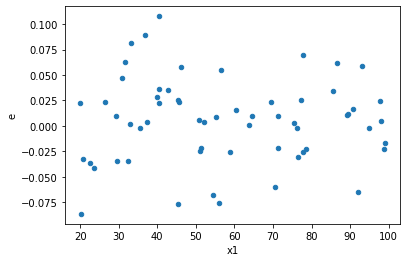

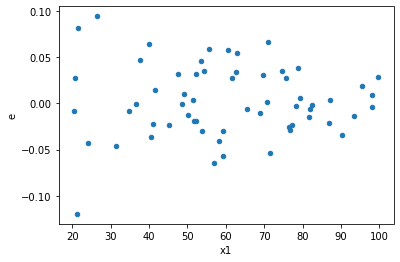

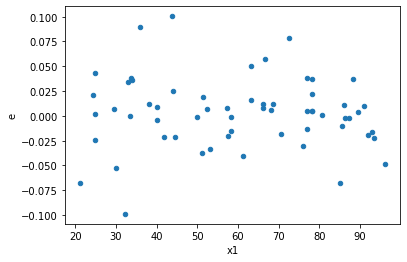

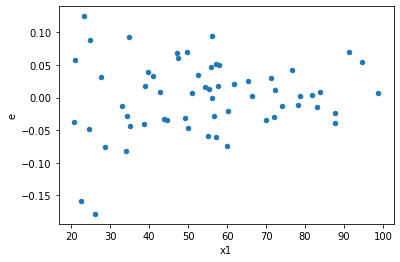

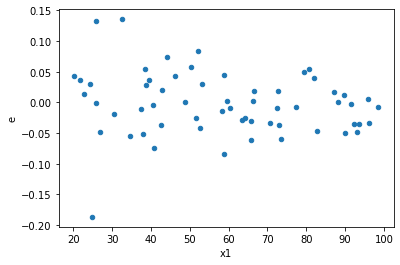

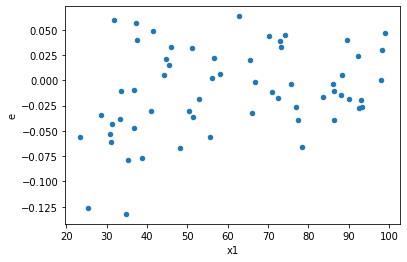

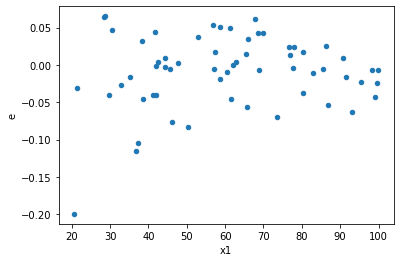

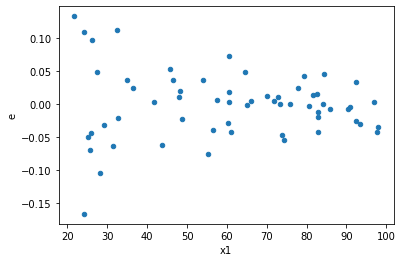

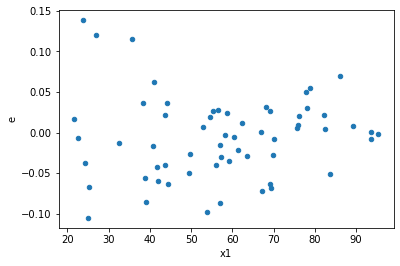

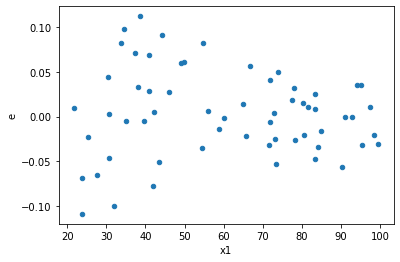

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,29.0,29.0,0.02321524826720685,0.14057108769173635,0.0008005258023174776,0.004847278885921943,6.055118862988976,5.798972059434249e-06,0.9999971005139703,2.8994860297171243e-06,Reject005=0 : Heteroscedasticity
3.0,30.0,28.0,0.050949318707485224,0.11452789353671583,0.0016983106235828407,0.004090281912025566,2.40844157436671,0.021801595299119514,0.9890992023504402,0.010900797649559757,Reject005=0 : Heteroscedasticity
4.0,32.0,26.0,0.03154259062572101,0.07530942876329329,0.0009857059570537816,0.0028965164908958956,2.9385198193926074,0.0061954157723542735,0.9969022921138229,0.0030977078861771368,Reject005=0 : Heteroscedasticity
5.0,27.0,31.0,0.024034964201011564,0.095828501147135,0.0008901838592967246,0.0030912419724882256,3.472588207710721,0.0010781530834742536,0.9994609234582629,0.0005390765417371268,Reject005=0 : Heteroscedasticity
6.0,22.0,36.0,0.008461928949264407,0.07856276974762802,0.0003846331340574731,0.0021822991596563337,5.673715981344051,4.868356662690587e-06,0.9999975658216687,2.4341783313452936e-06,Reject005=0 : Heteroscedasticity
7.0,23.0,35.0,0.014880149259371988,0.10903819643663792,0.000646963011277043,0.003115377041046798,4.815386639952325,3.332011553114356e-05,0.9999833399422344,1.666005776557178e-05,Reject005=0 : Heteroscedasticity
8.0,27.0,31.0,0.017561535908895837,0.07842997645381887,0.000650427255885031,0.00252999924044577,3.8897497261292053,0.00038329924197877396,0.9998083503790106,0.00019164962098938698,Reject005=0 : Heteroscedasticity
10.0,24.0,34.0,0.026521618023199287,0.07637158755159079,0.0011050674176333035,0.002246223163282082,2.0326571279178283,0.05669140018990948,0.9716542999050453,0.02834570009495474,Reject005=1 : Homoscedasticity
11.0,27.0,31.0,0.02013607344877539,0.06711444270464648,0.0007457804981027922,0.0021649820227305316,2.9029748407716185,0.004853789049845902,0.997573105475077,0.002426894524922951,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,28.0,0.12223774498666329,0.02447370167480691,0.004074591499555443,0.0008740607741002468,0.21451494565666543,7.361918783192897e-05,Reject005=0 : Heteroscedasticity
1.0,29.0,29.0,0.02321524826720685,0.14057108769173635,0.0008005258023174776,0.004847278885921943,6.055118862988976,5.798972059434249e-06,Reject005=0 : Heteroscedasticity
2.0,32.0,26.0,0.08192188150895761,0.0366378733757493,0.0025600587971549254,0.0014091489759903578,0.5504361765270351,0.10898377384292732,Reject005=1 : Homoscedasticity
3.0,30.0,28.0,0.050949318707485224,0.11452789353671583,0.0016983106235828407,0.004090281912025566,2.40844157436671,0.021801595299119514,Reject005=0 : Heteroscedasticity
4.0,32.0,26.0,0.03154259062572101,0.07530942876329329,0.0009857059570537816,0.0028965164908958956,2.9385198193926074,0.0061954157723542735,Reject005=0 : Heteroscedasticity
5.0,27.0,31.0,0.024034964201011564,0.095828501147135,0.0008901838592967246,0.0030912419724882256,3.472588207710721,0.0010781530834742536,Reject005=0 : Heteroscedasticity
6.0,22.0,36.0,0.008461928949264407,0.07856276974762802,0.0003846331340574731,0.0021822991596563337,5.673715981344051,4.868356662690587e-06,Reject005=0 : Heteroscedasticity
7.0,23.0,35.0,0.014880149259371988,0.10903819643663792,0.000646963011277043,0.003115377041046798,4.815386639952325,3.332011553114356e-05,Reject005=0 : Heteroscedasticity
8.0,27.0,31.0,0.017561535908895837,0.07842997645381887,0.000650427255885031,0.00252999924044577,3.8897497261292053,0.00038329924197877396,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    872
Reject005=1 : Homoscedasticity      128
Name: Result_test, dtype: int64